In [76]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import io
import numpy as np

In [77]:
data=pd.read_csv('year_data.csv')

In [80]:

data=data.drop('Unnamed: 0',axis=1)
data=data.drop('index',axis=1)

In [81]:
data

,StartDate,StartStationName,EndStationName,Nooftrips,date_code,so_code,sd_code
0,2022-01-01 00:00:00,"Wellington Arch, Hyde Park","Eastbourne Mews, Paddington",2,0.0,777.0,223.0
1,2022-01-01 00:00:00,"Abingdon Green, Westminster","Bayswater Road, Hyde Park",2,0.0,4.0,53.0
2,2022-01-01 00:00:00,"Erin Close, Walham Green","Westfield Southern Terrace ,Shepherd's Bush",1,0.0,236.0,794.0
3,2022-01-01 00:00:00,"Waterloo Bridge, South Bank","Bayley Street , Bloomsbury",2,0.0,768.0,51.0
4,2022-01-01 00:00:00,"Somerset House, Strand","Southampton Street, Strand",4,0.0,643.0,654.0
...,...,...,...,...,...,...,...
9822448,2022-12-31 00:00:00,"Kensington Church Street, Kensington","Parsons Green Station, Parsons Green",1,8683.0,394.0,533.0
9822449,2022-12-31 00:00:00,"Westfield Ariel Way, White City","Westfield Ariel Way, White City",1,8683.0,792.0,792.0
9822450,2022-12-31 00:00:00,"Belgrove Street , King's Cross","Horseferry Road, Westminster",2,8683.0,59.0,363.0
9822451,2022-12-31 00:00:00,"Clifford Street, Mayfair","Albany Street, The Regent's Park",3,8683.0,166.0,11.0


In [82]:
data['EndStationName'].unique()

array(['Eastbourne Mews, Paddington', 'Bayswater Road, Hyde Park',
       "Westfield Southern Terrace ,Shepherd's Bush",
       'Bayley Street , Bloomsbury', 'Southampton Street, Strand',
       'Concert Hall Approach 1, South Bank', 'Lollard Street, Vauxhall',
       'Normandy Road, Stockwell', 'Bricklayers Arms, Borough',
       'Lambeth Palace Road, Waterloo',
       'Wormwood Street, Liverpool Street', 'Lancaster Drive, Blackwall',
       'Wellington Arch, Hyde Park', 'Jubilee Plaza, Canary Wharf',
       'Borough Road, Elephant & Castle', 'Watney Market, Stepney',
       'Tavistock Place, Bloomsbury',
       'Royal London Hospital, Whitechapel', 'Bonny Street, Camden Town',
       'Fire Brigade Pier, Vauxhall', 'Cephas Street, Bethnal Green',
       'LSBU (Borough Road), Elephant & Castle',
       'Devonshire Terrace, Bayswater', 'Saltoun Road, Brixton',
       'Hampton Street, Walworth',
       'Ravenscourt Park Station, Hammersmith',
       'Ontario Street, Elephant & Castle',
 

In [83]:
arr=[[0 for i in range(814)] for j in range(8684)]
data['date_code']=data['date_code'].astype(int)
data['so_code']=data['so_code'].astype(int)
data['sd_code']=data['sd_code'].astype(int)

In [84]:
for index, row in data.iterrows():
    x=row['date_code']
    y=row['so_code']
    z=row['Nooftrips']
    arr[x][y]+=z

In [85]:
arr=np.array(arr)

In [86]:
arr

array([[19,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  3,  0,  0],
       [ 2,  0,  0, ...,  1,  3,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  2]])

In [87]:
column_values = [i for i in range(814)]
index_values=[i for i in range(8684)]

In [88]:
station_unique=pd.DataFrame(data[['StartStationName','so_code']].value_counts())

In [89]:
station_unique

,,count
StartStationName,so_code,
"Belgrove Street , King's Cross",59,45363
"Wormwood Street, Liverpool Street",807,43513
"Hyde Park Corner, Hyde Park",373,43197
"Hop Exchange, The Borough",362,41906
"Waterloo Station 1, Waterloo",771,40870
...,...,...
"Chicheley Street, South Bank",147,172
"Crimscott Street, Bermondsey",188,102
"Cartier Circle, Canary Wharf",128,70


In [90]:
station_unique=station_unique.reset_index()

In [91]:
df_st = pd.DataFrame(data = arr, 
                  index = index_values, 
                  columns = column_values)

In [92]:
df_st

,0,1,2,3,4,5,6,7,8,9,...,804,805,806,807,808,809,810,811,812,813
0,19,0,0,0,29,0,1,0,0,0,...,0,0,0,3,0,0,0,0,0,0
1,12,0,0,0,6,1,1,0,0,0,...,0,1,2,6,6,0,0,3,0,0
2,2,0,0,0,3,0,0,0,0,0,...,1,3,1,4,2,2,1,1,3,0
3,0,1,0,0,0,0,1,1,1,0,...,0,0,1,6,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,4,0,...,1,1,2,0,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,0,4,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8680,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
8681,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8682,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2,0,0,0,0,1,0


In [93]:
station_unique2=pd.DataFrame(data[['EndStationName','sd_code']].value_counts())

In [94]:
arr2=[[0 for i in range(814)] for j in range(8684)]

In [95]:
for index, row in data.iterrows():
    x=row['date_code']
    y=row['sd_code']
    z=row['Nooftrips']
    #print(x,y)
    arr2[x][y]+=z

In [96]:
column_values2 = [i for i in range(814)]
index_values2=[i for i in range(8684)]

In [97]:
df_en = pd.DataFrame(data = arr2, 
                  index = index_values2, 
                  columns = column_values2)

In [98]:
df_en

,0,1,2,3,4,5,6,7,8,9,...,804,805,806,807,808,809,810,811,812,813
0,1,0,0,1,9,0,0,0,0,2,...,3,3,1,10,0,12,7,0,2,0
1,5,0,4,0,1,0,0,0,0,0,...,0,2,0,7,0,4,0,2,0,0
2,0,0,0,0,5,0,4,3,1,0,...,3,0,0,3,1,1,0,0,2,1
3,0,0,0,0,9,0,0,0,2,0,...,0,0,1,2,2,2,0,0,0,2
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,0,1,0,0,0,0,0,0,1,0,...,0,2,1,0,0,0,0,1,0,0
8680,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8681,0,0,1,0,0,0,0,0,0,0,...,0,0,2,1,0,4,1,0,1,0
8682,0,0,0,0,0,0,0,1,0,0,...,3,0,1,1,0,0,0,0,0,1


In [100]:
df_final=df_en-df_st

In [101]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,804,805,806,807,808,809,810,811,812,813
0,-18,0,0,1,-20,0,-1,0,0,2,...,3,3,1,7,0,12,7,0,2,0
1,-7,0,4,0,-5,-1,-1,0,0,0,...,0,1,-2,1,-6,4,0,-1,0,0
2,-2,0,0,0,2,0,4,3,1,0,...,2,-3,-1,-1,-1,-1,-1,-1,-1,1
3,0,-1,0,0,9,0,-1,-1,1,0,...,0,0,0,-4,2,1,-1,-1,-1,2
4,0,0,0,1,0,0,1,0,-4,0,...,-1,0,-2,0,1,0,0,0,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,0,-3,0,0,0,-1,0,0,1,0,...,0,2,1,-1,0,0,-1,1,0,0
8680,0,-1,0,0,0,0,0,1,0,0,...,-1,0,0,-1,0,1,0,0,-1,-1
8681,0,0,1,0,0,0,0,0,0,0,...,-1,0,2,1,0,4,1,0,1,0
8682,0,0,0,0,0,0,0,1,0,0,...,2,0,0,-1,0,0,0,0,-1,1


In [138]:
recover_data_station

,index,StartStationName,so_code,count
0,285,"Abbey Orchard Street, Westminster",0,13284
1,732,"Abbotsbury Road, Holland Park",1,4645
2,605,"Aberdeen Place, St. John's Wood",2,7642
3,775,"Aberfeldy Street, Poplar",3,3351
4,301,"Abingdon Green, Westminster",4,13064
...,...,...,...,...
809,331,"Wren Street, Holborn",809,12452
810,128,"Wright's Lane, Kensington",810,17497
811,714,"Wynne Road, Stockwell",811,5116
812,248,"York Hall, Bethnal Green",812,13936


In [111]:
recover_data_station=station_unique.sort_values(by=['so_code']).reset_index()


In [113]:
date=data[['StartDate','date_code']]

In [120]:
date=pd.DataFrame(date.value_counts().reset_index())

In [132]:
date_recover=date.sort_values(by=['date_code']).reset_index()

In [130]:
df_final.to_csv('matrix.csv')

In [135]:
date_recover=date_recover.drop('level_0',axis=1)

In [137]:
date_recover.to_csv('date_recover.csv')

In [139]:
recover_data_station.to_csv('station_recover.csv')

In [145]:
import matplotlib.pyplot as plt

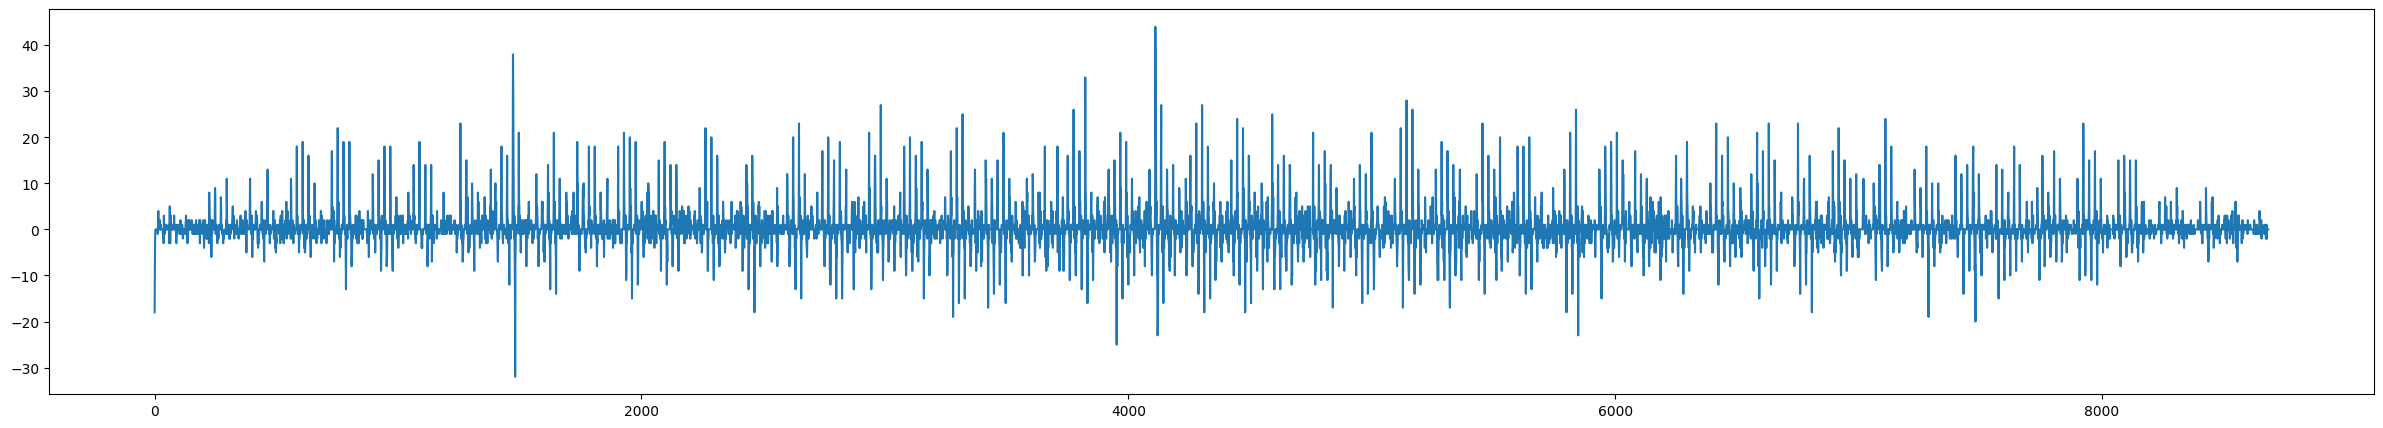

In [147]:
plt.figure(figsize=(30,5))
plt.plot(df_final[0])

In [148]:
df_final.reset_index()

,0,1,2,3,4,5,6,7,8,9,...,804,805,806,807,808,809,810,811,812,813
0,-18,0,0,1,-20,0,-1,0,0,2,...,3,3,1,7,0,12,7,0,2,0
1,-7,0,4,0,-5,-1,-1,0,0,0,...,0,1,-2,1,-6,4,0,-1,0,0
2,-2,0,0,0,2,0,4,3,1,0,...,2,-3,-1,-1,-1,-1,-1,-1,-1,1
3,0,-1,0,0,9,0,-1,-1,1,0,...,0,0,0,-4,2,1,-1,-1,-1,2
4,0,0,0,1,0,0,1,0,-4,0,...,-1,0,-2,0,1,0,0,0,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,0,-3,0,0,0,-1,0,0,1,0,...,0,2,1,-1,0,0,-1,1,0,0
8680,0,-1,0,0,0,0,0,1,0,0,...,-1,0,0,-1,0,1,0,0,-1,-1
8681,0,0,1,0,0,0,0,0,0,0,...,-1,0,2,1,0,4,1,0,1,0
8682,0,0,0,0,0,0,0,1,0,0,...,2,0,0,-1,0,0,0,0,-1,1


In [149]:
date_recover

,index,StartDate,date_code,count
0,4885,2022-01-01 00:00:00,0,801
1,4687,2022-01-01 01:00:00,1,865
2,5317,2022-01-01 02:00:00,2,665
3,5909,2022-01-01 03:00:00,3,475
4,6399,2022-01-01 04:00:00,4,315
...,...,...,...,...
8679,6386,2022-12-30 20:00:00,8679,317
8680,6617,2022-12-30 21:00:00,8680,252
8681,6558,2022-12-30 22:00:00,8681,269
8682,6859,2022-12-30 23:00:00,8682,204


In [151]:
df_final['StartDate']=date_recover['StartDate']

In [152]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,805,806,807,808,809,810,811,812,813,StartDate
0,-18,0,0,1,-20,0,-1,0,0,2,...,3,1,7,0,12,7,0,2,0,2022-01-01 00:00:00
1,-7,0,4,0,-5,-1,-1,0,0,0,...,1,-2,1,-6,4,0,-1,0,0,2022-01-01 01:00:00
2,-2,0,0,0,2,0,4,3,1,0,...,-3,-1,-1,-1,-1,-1,-1,-1,1,2022-01-01 02:00:00
3,0,-1,0,0,9,0,-1,-1,1,0,...,0,0,-4,2,1,-1,-1,-1,2,2022-01-01 03:00:00
4,0,0,0,1,0,0,1,0,-4,0,...,0,-2,0,1,0,0,0,-5,0,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,0,-3,0,0,0,-1,0,0,1,0,...,2,1,-1,0,0,-1,1,0,0,2022-12-30 20:00:00
8680,0,-1,0,0,0,0,0,1,0,0,...,0,0,-1,0,1,0,0,-1,-1,2022-12-30 21:00:00
8681,0,0,1,0,0,0,0,0,0,0,...,0,2,1,0,4,1,0,1,0,2022-12-30 22:00:00
8682,0,0,0,0,0,0,0,1,0,0,...,0,0,-1,0,0,0,0,-1,1,2022-12-30 23:00:00


In [154]:
df_final2=df_final.set_index('StartDate')

In [155]:
df_final2.to_csv('matrix.csv')

In [181]:
pd.DataFrame(df_st.sum().values ).T

new_df=pd.concat([df_st,pd.DataFrame(df_st.sum().values ).T]).reset_index(drop=True)

In [186]:
new_df.T.sort_values(by=[8684],ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684
373,1,4,7,4,2,0,0,0,1,0,...,17,2,0,2,5,0,7,2,1,85964
15,6,0,2,0,0,0,0,0,1,2,...,11,1,3,0,0,2,6,4,0,53485
59,0,0,2,0,2,0,1,2,0,3,...,5,1,2,0,0,2,0,0,2,52961
773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50986
362,12,2,13,2,4,2,1,0,0,1,...,8,2,2,3,0,0,0,0,2,50189
807,3,6,4,6,0,2,6,0,0,0,...,4,2,2,1,1,1,0,2,1,49670
771,22,12,2,5,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48280
777,36,27,6,3,1,0,0,0,2,0,...,0,1,1,1,0,0,3,0,0,47881
214,8,26,5,11,2,0,5,3,0,0,...,0,3,1,0,6,0,3,1,1,46921
76,0,0,0,0,0,0,0,0,1,0,...,15,0,0,0,0,0,0,0,0,46375


In [187]:
pd.DataFrame(df_en.sum().values ).T

new_df2=pd.concat([df_en,pd.DataFrame(df_en.sum().values ).T]).reset_index(drop=True)

In [189]:
new_df2.T.sort_values(by=[8684],ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684
373,5,6,6,1,0,0,0,1,3,12,...,16,4,0,1,4,0,1,0,0,85935
362,6,2,2,7,3,2,1,0,0,1,...,3,3,1,3,1,1,0,1,5,66002
15,4,0,3,0,0,0,0,0,1,5,...,6,0,0,0,0,2,0,0,0,53274
59,5,1,3,0,0,0,0,0,1,0,...,6,4,3,4,3,1,1,0,1,53270
773,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51855
807,10,7,3,2,0,3,0,0,0,1,...,0,0,4,0,0,0,1,1,0,50098
108,0,2,1,3,2,0,0,1,1,1,...,4,1,0,0,1,0,2,0,1,49902
214,8,12,9,8,4,5,4,2,4,0,...,3,4,1,1,1,0,5,0,2,49703
777,40,11,5,1,4,0,0,0,1,5,...,0,0,0,2,0,0,0,0,0,47894
76,0,0,0,0,0,0,0,0,1,0,...,11,1,0,0,0,0,0,0,0,46555


In [191]:
df_sum=df_en+df_st

In [192]:
pd.DataFrame(df_sum.sum().values ).T

new_df_sum=pd.concat([df_sum,pd.DataFrame(df_sum.sum().values ).T]).reset_index(drop=True)

In [193]:
new_df_sum.T.sort_values(by=[8684],ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684
373,6,10,13,5,2,0,0,1,4,12,...,33,6,0,3,9,0,8,2,1,171899
362,18,4,15,9,7,4,2,0,0,2,...,11,5,3,6,1,1,0,1,7,116191
15,10,0,5,0,0,0,0,0,2,7,...,17,1,3,0,0,4,6,4,0,106759
59,5,1,5,0,2,0,1,2,1,3,...,11,5,5,4,3,3,1,0,3,106231
773,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,102841
807,13,13,7,8,0,5,6,0,0,1,...,4,2,6,1,1,1,1,3,1,99768
214,16,38,14,19,6,5,9,5,4,0,...,3,7,2,1,7,0,8,1,3,96624
777,76,38,11,4,5,0,0,0,3,5,...,0,1,1,3,0,0,3,0,0,95775
771,36,14,2,6,7,4,0,0,2,3,...,0,0,0,0,0,0,0,0,0,94298
108,1,6,1,5,2,1,1,1,2,2,...,8,4,1,2,1,1,7,0,2,92976
